## Implementação de uma arquitetura Multilayer Perceptron - MLP
##### Prof. Me. Victor Hugo Braguim Canto
##### Íris Dataset (UCI)

##### Importação das Bibliotecas

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

##### Importação da Base de Dados Íris da UCI

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

##### Visualização da Distribuição das Espécies

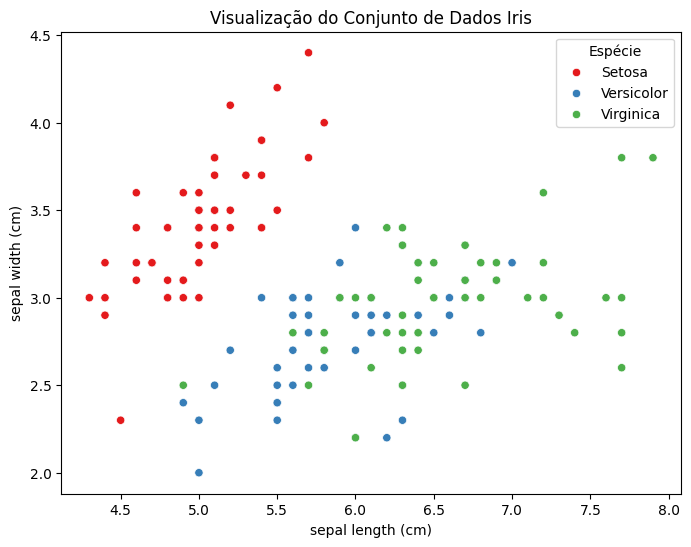

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_mapping)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['species'], palette="Set1")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Visualização do Conjunto de Dados Iris")
plt.legend(title="Espécie")
plt.show()

##### Visualização dos Dados

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

##### Visualização dos Dados de Target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### Normalização dos Dados

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

##### Transformando os Dados na Estrutura de Tensores

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

##### Visualizando o Tensor X

In [ ]:
X_tensor

tensor([[-9.0068e-01,  1.0190e+00, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00, -1.3198e-01, -1.3402e+00, -1.3154e+00],
        [-1.3854e+00,  3.2841e-01, -1.3971e+00, -1.3154e+00],
        [-1.5065e+00,  9.8217e-02, -1.2834e+00, -1.3154e+00],
        [-1.0218e+00,  1.2492e+00, -1.3402e+00, -1.3154e+00],
        [-5.3718e-01,  1.9398e+00, -1.1697e+00, -1.0522e+00],
        [-1.5065e+00,  7.8881e-01, -1.3402e+00, -1.1838e+00],
        [-1.0218e+00,  7.8881e-01, -1.2834e+00, -1.3154e+00],
        [-1.7489e+00, -3.6218e-01, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00,  9.8217e-02, -1.2834e+00, -1.4471e+00],
        [-5.3718e-01,  1.4794e+00, -1.2834e+00, -1.3154e+00],
        [-1.2642e+00,  7.8881e-01, -1.2266e+00, -1.3154e+00],
        [-1.2642e+00, -1.3198e-01, -1.3402e+00, -1.4471e+00],
        [-1.8700e+00, -1.3198e-01, -1.5107e+00, -1.4471e+00],
        [-5.2506e-02,  2.1700e+00, -1.4539e+00, -1.3154e+00],
        [-1.7367e-01,  3.0908e+00, -1.2834e+00, -1.0522e+00],
        

##### Realizando o Split da Base de Dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

##### Transformando os Dados no Padrão do TensorDataset

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

##### Criando a Arquitetura Multilayer Perceptron

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

##### Plotando a arquitetura na forma de neurônios

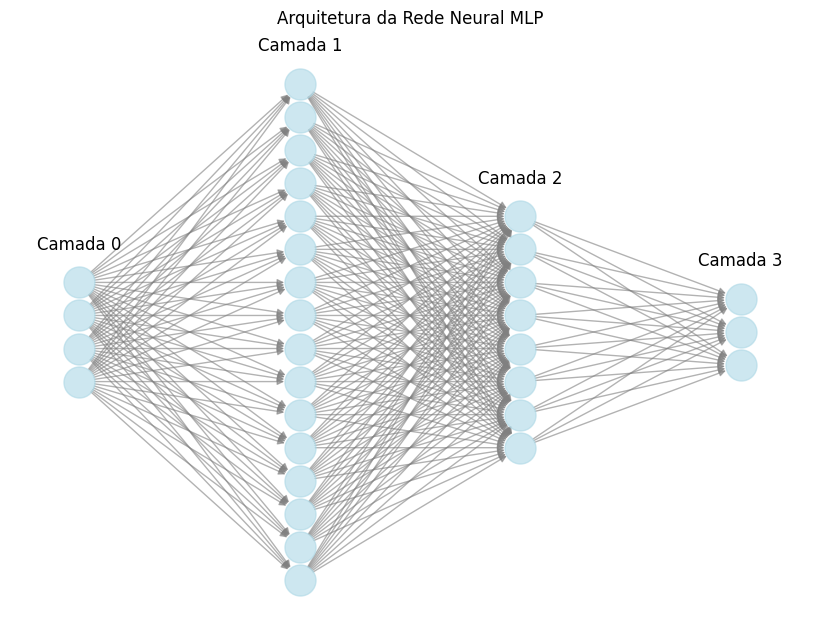

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

layers = [4, 16, 8, 3]

G = nx.DiGraph()

positions = {}
y_offset = 0

for layer_idx, num_neurons in enumerate(layers):
    for neuron_idx in range(num_neurons):
        node_name = f"L{layer_idx}_N{neuron_idx}"
        G.add_node(node_name, layer=layer_idx)
        positions[node_name] = (layer_idx, -neuron_idx + num_neurons / 2)

for layer_idx in range(len(layers) - 1):
    for src in range(layers[layer_idx]):
        for dst in range(layers[layer_idx + 1]):
            src_node = f"L{layer_idx}_N{src}"
            dst_node = f"L{layer_idx+1}_N{dst}"
            G.add_edge(src_node, dst_node)

plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=False, node_size=500, node_color="lightblue", edge_color="gray", alpha=0.6)

for layer_idx, num_neurons in enumerate(layers):
    plt.text(layer_idx, num_neurons / 2 + 1, f"Camada {layer_idx}", fontsize=12, ha="center")

plt.title("Arquitetura da Rede Neural MLP")
plt.show()

##### Criando o objeto MLP

In [ ]:
model = MLP()

##### Definindo as Funções de Perda e Otimizador

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

##### Treinando o Modelo

In [ ]:
epochs = 50
for epoch in range(epochs):
    for batch in train_loader:
        X_batch, y_batch = batch

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/50, Loss: 0.8187
Epoch 2/50, Loss: 0.4828
Epoch 3/50, Loss: 0.4488
Epoch 4/50, Loss: 0.2686
Epoch 5/50, Loss: 0.4723
Epoch 6/50, Loss: 0.0713
Epoch 7/50, Loss: 0.2092
Epoch 8/50, Loss: 0.1137
Epoch 9/50, Loss: 0.1033
Epoch 10/50, Loss: 0.3049
Epoch 11/50, Loss: 0.0443
Epoch 12/50, Loss: 0.0262
Epoch 13/50, Loss: 0.0229
Epoch 14/50, Loss: 0.0145
Epoch 15/50, Loss: 0.3450
Epoch 16/50, Loss: 0.0298
Epoch 17/50, Loss: 0.0228
Epoch 18/50, Loss: 0.0160
Epoch 19/50, Loss: 0.0176
Epoch 20/50, Loss: 0.0467
Epoch 21/50, Loss: 0.0165
Epoch 22/50, Loss: 0.0073
Epoch 23/50, Loss: 0.0014
Epoch 24/50, Loss: 0.0468
Epoch 25/50, Loss: 0.0161
Epoch 26/50, Loss: 0.1388
Epoch 27/50, Loss: 0.0202
Epoch 28/50, Loss: 0.1070
Epoch 29/50, Loss: 0.3031
Epoch 30/50, Loss: 0.2139
Epoch 31/50, Loss: 0.0077
Epoch 32/50, Loss: 0.0029
Epoch 33/50, Loss: 0.0125
Epoch 34/50, Loss: 0.0372
Epoch 35/50, Loss: 0.1798
Epoch 36/50, Loss: 0.0328
Epoch 37/50, Loss: 0.0937
Epoch 38/50, Loss: 0.0796
Epoch 39/50, Loss: 0.

##### Testando o Modelo

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        X_batch, y_batch = batch
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = 100 * correct / total
print(f'Acurácia no conjunto de teste: {accuracy:.2f}%')

Acurácia no conjunto de teste: 100.00%


#### Por que 100% nos dados de testes?

*   Não é comum.
*   Mas, temos um problemas simples com uma base estruturada.
*   Fique atento(a), em outras bases, caso isso ocorra, há a possibilidade de ser overfitting!

